# Analysis of Groove Widths in Periodic DNA

Now I'll use pyña to analyze the major and minor groove widths from Eva's results for the periodic DNA.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import pyna
rcParams['figure.figsize'] = 12, 8
rcParams['font.size'] = 20
periodic = pyna.CurvesAnalysis('../curves_output.data')

In [2]:
minor = periodic.panels['groupE']['w12']
major = periodic.panels['groupE']['w21']

In [3]:
w12_by_location = [pyna.StrandStatistics(minor, locations=loc) for loc in minor.columns]
w21_by_location = [pyna.StrandStatistics(major, locations=loc) for loc in major.columns]
# TODO: StrandStatistics needs a default label to use

In [4]:
# TODO: all of these should be simplified by wrapping the above into some object
minor_means = [loc.mean() for loc in w12_by_location]
minor_stds = [loc.std() for loc in w12_by_location]
major_means = [loc.mean() for loc in w21_by_location]
major_stds = [loc.std() for loc in w21_by_location]

xvals = minor.columns.values

(0, 16.0)

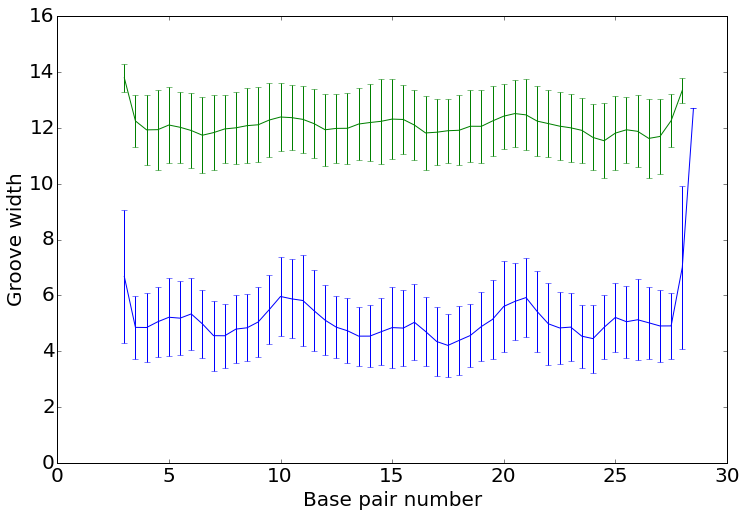

In [5]:
plt.figure()
plt.errorbar(xvals, minor_means, yerr=minor_stds)
plt.errorbar(xvals, major_means, yerr=major_stds)
plt.xlabel("Base pair number")
plt.ylabel("Groove width")
plt.gca().set_ylim(ymin=0); # force the yaxis to go to 0

In [6]:
pyna.AnimatedDataFrame(minor).show()

In [7]:
# TODO: replace these hists with my histogram object
hists = [loc.hist(bins=28, range=(0.0,14.0)) for loc in w12_by_location]

In [8]:
# get bins:
for hist in hists:
    if len(hist[1]) > 0:
        bins = hist[1]
        break
#print bins
hist_dict = {}
for i in range(len(hists)):
    if len(hists[i][0]) == 0:
        myhist = [0]*(len(bins)-1)
    else:
        myhist = hists[i][0]
    hist_dict[minor.columns.values[i]] = myhist

In [9]:
import pandas as pd
hist_df = pd.DataFrame(hist_dict).set_index(bins[:-1])

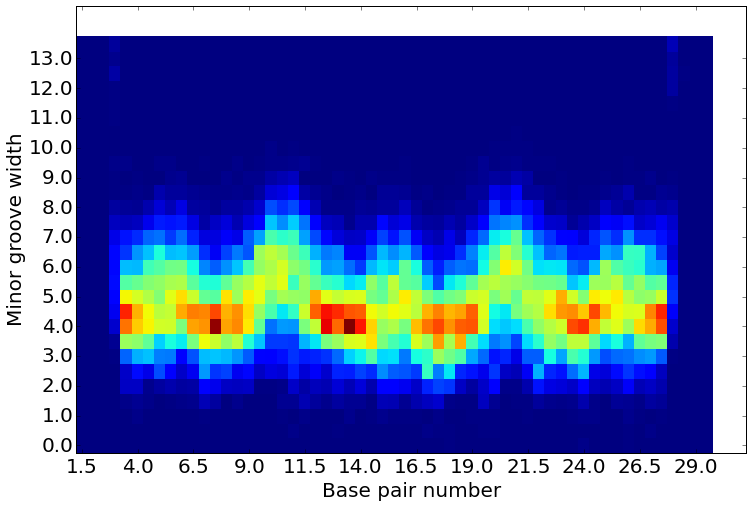

In [10]:
plt.pcolor(hist_df)
plt.yticks(np.arange(0.5, len(hist_df.index), 2), hist_df.index[::2])
plt.xticks(np.arange(0.5, len(hist_df.columns), 5), hist_df.columns[::5])
plt.xlabel("Base pair number")
plt.ylabel("Minor groove width")
plt.show()
#TODO: recheck that the tick marks are really correct here

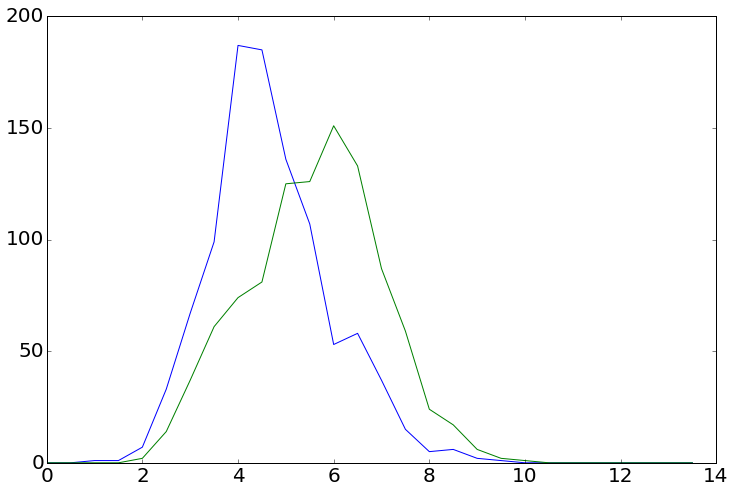

In [11]:
plt.plot(hist_df.index, hist_df[19.0])
plt.plot(hist_df.index, hist_df[20.5])